<a href="https://colab.research.google.com/github/colbyryan2019/colbyryan2019/blob/main/Union_College_Sports_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION

The story that I am trying to analyze is the mention of sports according to how well Union's teams are doing at the time. I want to see if sports are mentioned significantly more if the team is doing well than if they are doing poorly. How I plan on doing this:

First, I will iterate through the text by year, and graph the number of times the word of each sport appears. I will be analyzing four sports - soccer, baseball, basketball, and football. 

I will find the polarity score of the sentence in which one of these words appear, and find graph a yearly average polarity for each sport. 

My plan is to graph my findings, and compare them to the ACTUAL records of how well each team did in the past. 

I expect difficulties in tokenizing and isolating sentences where the words appear, and also in drawing conclusions based on the frequency of the sport appearing - especially because of how the Newspaper and the sports evolved over the 114 year period.




In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import urllib
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError
from nltk.tokenize import word_tokenize, sent_tokenize
import string

nltk.download('punkt')
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


#def avg(numbers):

#This function takes sent_tokenized texts as a parameter and finds
#the average polarity score of every sentence in which the word parameter appears
def averagePolarityScore(sentences, word):
  #sentenceCount is used to count the number of sentences in which the word appears, 
  #important distinction from how many times the WORD appears
  sentenceCount = 0
  totalPolarity = 0
  for sentence in sentences:
    if word in sentence:
      polarity = sia.polarity_scores(sentence)
      score = polarity.get('compound')
      totalPolarity = totalPolarity + score
      sentenceCount = sentenceCount + 1
  
  if sentenceCount == 0:
    return 0
  else:
    return totalPolarity/sentenceCount



folder = "https://cs-gitlab.union.edu/webbn/concordy/raw/master/Text/"


start_year = 1880
end_year = 2000
years = range(start_year,end_year+1)

#keep tracks of the length of the texts for each year.
yearly_lengths = []

#keep tracks of the number of sentences in the text each year
yearly_sentences = []

soccer = []
#Average yearly polarity score in every sentence where the word 'soccer' appeared.
soccerAverages = []

football = []
#Average yearly polarity score in every sentence where the word 'football' appeared.
footballAverages = []

baseball = []
#Average yearly polarity score in every sentence where the word 'baseball' appeared.
baseballAverages = []

basketball = []
#Average yearly polarity score in every sentence where the word 'basketball' appeared.
basketballAverages = []

dutchmen = []


for year in years:

  print(year)  
  year_text =""

  for month in range(1,13):

    monthStr = str(month)

    if month < 10:
      monthStr = "0"+monthStr
    
    path = folder+str(year)+"-"+monthStr+".txt"
    req = Request(path)
  
    try:
      urlopen(req)
    except HTTPError as e:
      # do something
      print(monthStr,'MISSING: Error code: ', e.code)
    except URLError as e:
      # do something
      print('Reason: ', e.reason)
    else:
      
      response = urllib.request.urlopen(path)
      data = response.read()      
      text = data.decode('utf-8') 
      year_text+=text



  year_text = year_text.lower()
  yearlyLength = len(year_text)
  yearly_lengths.append(yearlyLength)

  soccer.append(year_text.count('soccer'))
  basketball.append(year_text.count('basketball'))
  baseball.append(year_text.count('baseball'))
  football.append(year_text.count('football'))
  dutchmen.append(year_text.count('dutchmen'))
  
  sentences = nltk.sent_tokenize(year_text)
  numSentences = len(sentences)
  yearly_sentences.append(numSentences)


  soccerPolarity = averagePolarityScore(sentences, 'soccer')
  soccerAverages.append(soccerPolarity)
  baseballPolarity = averagePolarityScore(sentences, 'baseball')
  baseballAverages.append(baseballPolarity)
  footballPolarity = averagePolarityScore(sentences, 'football')
  footballAverages.append(footballPolarity)
  basketballPolarity = averagePolarityScore(sentences, 'basketball')
  basketballAverages.append(basketballPolarity)

  



/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
1880
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1881
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1882
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1883
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1884
06 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1885
06 MISSING: Error code:  404
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
12 MISSING: Error code:  404
1886
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1887
07 MISSING: Error code:  404
08 MISSING: Error code:  404
1888
07 MISSING: Error code:  404
08 MISSING: Error code:  40

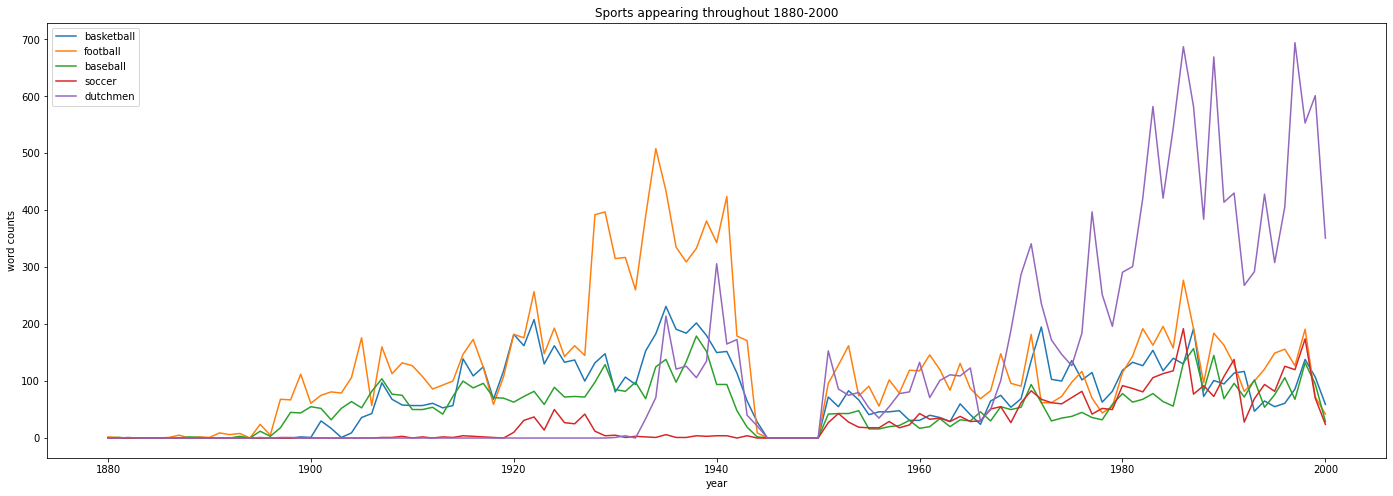

In [ ]:
# Ok, let's do the plotting
# Years on the x axis
# Count of terms on the y axis
# Lines for men and women

import matplotlib.pyplot as plt
%matplotlib inline

#print(basketball)
#print(soccer)
#print(baseball)
#print(football)

#print("baseball:", baseballAverages)
#print("football:", footballAverages)
#print("soccer:", soccerAverages)
#print("basketball:", basketballAverages)

plt.figure(figsize = (24, 8))
plt.plot(years,basketball,label='basketball')
plt.plot(years,football,label='football')
plt.plot(years,baseball,label='baseball')
plt.plot(years,soccer,label='soccer')
plt.plot(years,dutchmen,label='dutchmen')

plt.title('Sports appearing throughout 1880-2000')
plt.xlabel('year')
plt.ylabel('word counts')
plt.legend()
plt.show()

#Interpretting First Graph

The first graph simply shows the amount each sport appeared, and already I can see problems with how I will use my information. 
One thing that I had not yet taken into account was the length of each newspaper, so instead I'm going to graph and analyze the ratio of the target words / the length of that years paper.

Another problem that arose that I had not considered was the difference in popularity of each sport. 'Football' consistently appeared the most frequently, likely due to the popularity of the sport. Therefore, instead of comparing the sports to each other, I will compare the sports to themselves year by year. 

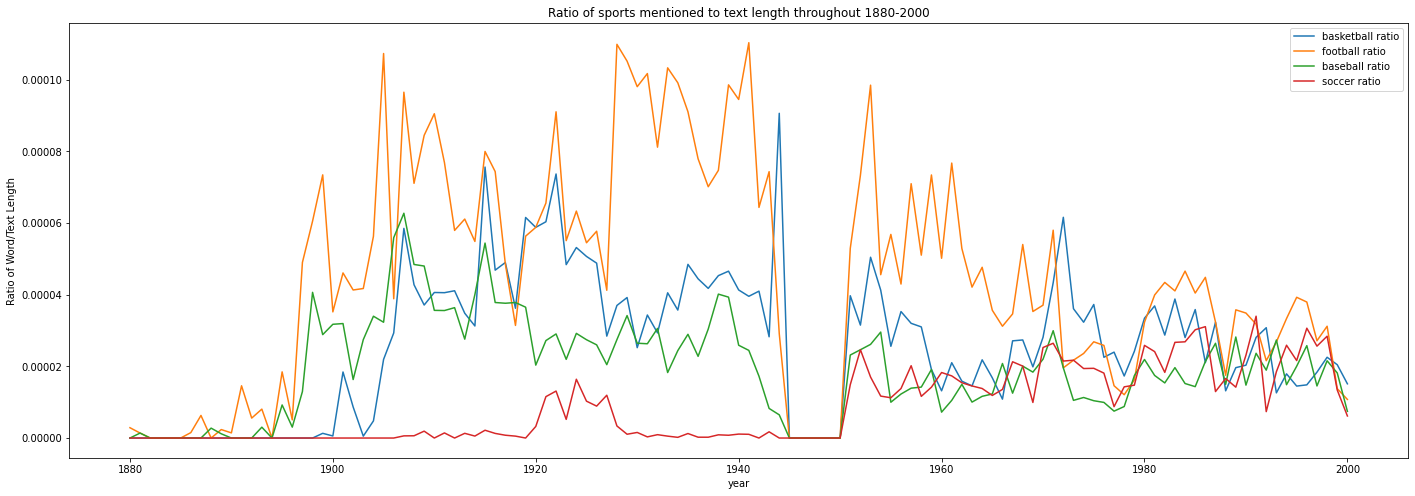

In [ ]:
plt.figure(figsize = (24, 8))

soccerRatio = []
basketballRatio = []
footballRatio = []
baseballRatio = []

index = 0
for year in years:
  if yearly_lengths[index]!=0:
    soccerRatio.append(soccer[index]/yearly_lengths[index])
    basketballRatio.append(basketball[index]/yearly_lengths[index])
    footballRatio.append(football[index]/yearly_lengths[index])
    baseballRatio.append(baseball[index]/yearly_lengths[index])
  else:
    soccerRatio.append(0)
    basketballRatio.append(0)
    footballRatio.append(0)
    baseballRatio.append(0)
  #print(yearly_lengths[index])
  index = index+1


plt.plot(years,basketballRatio,label='basketball ratio')
plt.plot(years,footballRatio,label='football ratio')
plt.plot(years,baseballRatio,label='baseball ratio')
plt.plot(years,soccerRatio,label='soccer ratio')
#plt.plot(years,dutchmen,label='dutchmen')

plt.title('Ratio of sports mentioned to text length throughout 1880-2000')
plt.xlabel('year')
plt.ylabel('Ratio of Word/Text Length')
plt.legend()
plt.show()

#INTERPRETTING SECOND GRAPH

This graph was very telling - it showed that certain dips in the first graph (such as 1988), were not due to the length of that years text, but rather due to a lack of mentions of sports that year.

This graph also showed me that it would be much more relevent to graph the ratio of times each word was mentioned to the number of sentences in the yearly text.



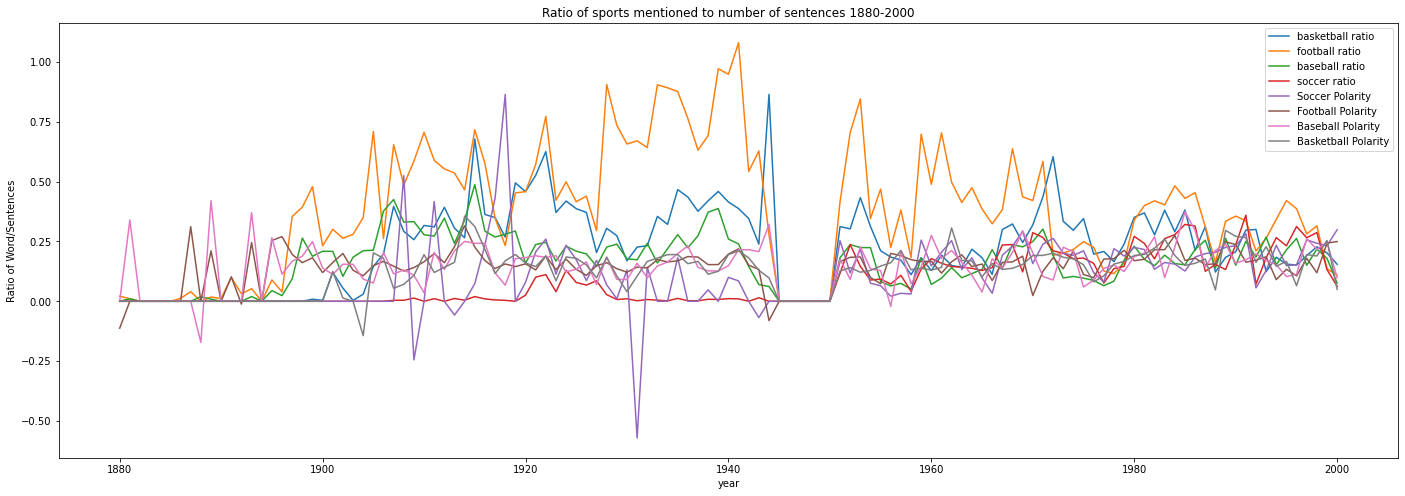

In [ ]:
plt.figure(figsize = (24, 8))

soccerSentRatio = []
basketballSentRatio = []
footballSentRatio = []
baseballSentRatio = []

index = 0
for year in years:
  if yearly_sentences[index] != 0:
    soccerSentRatio.append(soccer[index]*100/yearly_sentences[index])
    basketballSentRatio.append(basketball[index]*100/yearly_sentences[index])
    footballSentRatio.append(football[index]*100/yearly_sentences[index])
    baseballSentRatio.append(baseball[index]*100/yearly_sentences[index])
  else:
    soccerSentRatio.append(0)
    basketballSentRatio.append(0)
    footballSentRatio.append(0)
    baseballSentRatio.append(0)
  #print(yearly_lengths[index])
  index = index+1


plt.plot(years,basketballSentRatio,label='basketball ratio')
plt.plot(years,footballSentRatio,label='football ratio')
plt.plot(years,baseballSentRatio,label='baseball ratio')
plt.plot(years,soccerSentRatio,label='soccer ratio')
#plt.plot(years,dutchmen,label='dutchmen')


plt.title('Ratio of Sports From 1880-2000')
plt.xlabel('year')
plt.legend()
plt.show()

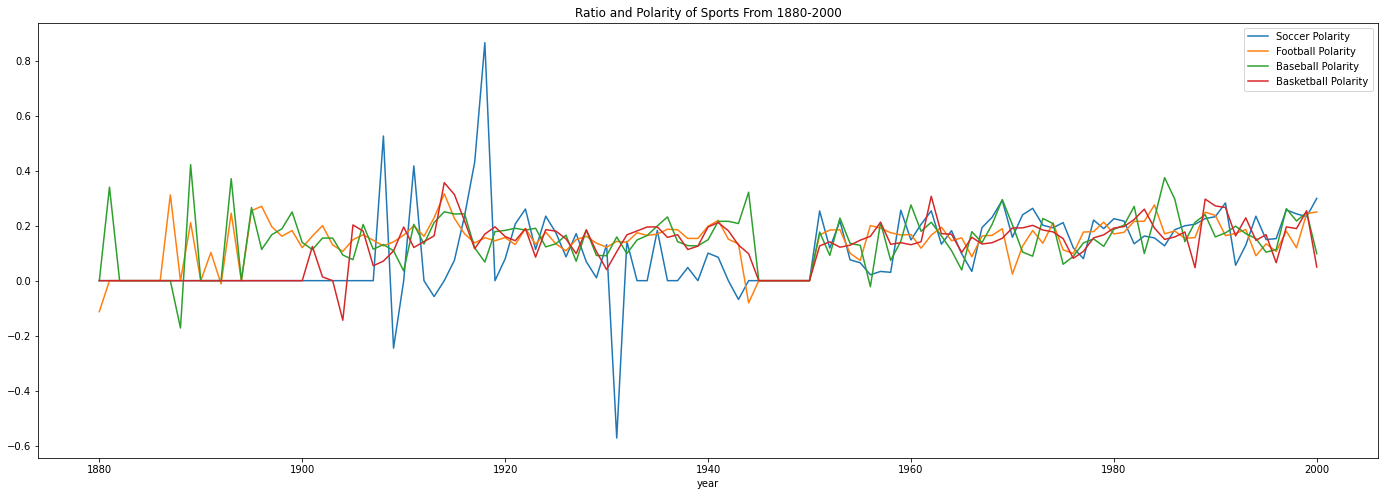

In [ ]:
plt.figure(figsize=(24,8))
plt.plot(years,soccerAverages,label='Soccer Polarity')
plt.plot(years,footballAverages,label='Football Polarity')
plt.plot(years,baseballAverages,label='Baseball Polarity')
plt.plot(years,basketballAverages,label='Basketball Polarity')


plt.title('Polarity of Sports From 1880-2000')
plt.xlabel('year')
plt.legend()
plt.show()


In [ ]:
def highest(numbers):
  high = -1
  index = 0
  highIndex = 0
  for num in numbers:
    if num > high:
      high = num
      highIndex = index
    index = index + 1
  return highIndex

def lowest(numbers):
  low = 999999
  index = 0
  lowIndex = 0
  for num in numbers:
    if num < low and num > 0:
      low = num
      lowIndex = index
    index = index + 1
  return lowIndex



print("Highest Soccer Polarity: ",years[highest(soccerAverages)])
print("Lowest Soccer Polarity: ",years[lowest(soccerAverages)])
print("Highest Soccer Ratio: ",years[highest(soccerSentRatio)])
print("Lowest Soccer Ratio: ",years[lowest(soccerSentRatio)])

print("\nHighest Baseball Polarity: ",years[highest(baseballAverages)])
print("Lowest Baseball Polarity: ",years[lowest(baseballAverages)])
print("Highest Baseball Ratio: ",years[highest(baseballSentRatio)])
print("Lowest Baseball Ratio: ",years[lowest(baseballSentRatio)])

print("\nHighest Football Polarity: ",years[highest(footballAverages)])
print("Lowest Football Polarity: ",years[lowest(footballAverages)])
print("Highest Football Ratio: ",years[highest(footballSentRatio)])
print("Lowest Football Ratio: ",years[lowest(footballSentRatio)])

print("\nHighest Basketball Polarity: ",years[highest(basketballAverages)])
print("Lowest Basketball Polarity: ",years[lowest(basketballAverages)])
print("Highest Basketball Ratio: ",years[highest(basketballSentRatio)])
print("Lowest Basketball Ratio: ",years[lowest(basketballSentRatio)])

Highest Soccer Polarity:  1918
Lowest Soccer Polarity:  1929
Highest Soccer Ratio:  1991
Lowest Soccer Ratio:  1934

Highest Baseball Polarity:  1889
Lowest Baseball Polarity:  1910
Highest Baseball Ratio:  1915
Lowest Baseball Ratio:  1889

Highest Football Polarity:  1914
Lowest Football Polarity:  1970
Highest Football Ratio:  1941
Lowest Football Ratio:  1881

Highest Basketball Polarity:  1914
Lowest Basketball Polarity:  1902
Highest Basketball Ratio:  1944
Lowest Basketball Ratio:  1903


Now, I will compare the results with the actual records of Union's sports teams.




#Calculating The Polarity's




As I iterated through the texts, I calculated the polarity score of each sentence that the words 'Football', 'Basketball', 'Soccer', and 'Baseball' appeared (separately). I then found the average for each sport and each year. 



---
#Results


1914 proved to be a good year for Union College Athletics. The football team had a record of 8-0-0, and the basketball team had a record of 11-3 in the 2013-2014 season, and 13-1 in the 2014-2015 season. This was reflected in the graphs of polarity in all mentions of 'Football' and 'Basketball' in the Concordy. I was happy to find this direct correlation between the polarity of the sentences the sports were in and the record of the sports team during those years.




---


#Calculating The Ratio's

To Calculate the ratio's, I counted the number of sentences that each word appeared in, and divided it by the total number of sentences. I decided that this would give more informative results than calculating the instances of words divided by the length of the entire text. 



---
#Results

All the years that the ratio was at a low, the team either did not exist or had a negative ratio. 
Unfortunately, I did not find any conclusive connections between the highest Ratio's and the sports records. These ratios were too easily influenced by outside factors that I had not considered, such as other more important events taking place during the years that would lower the ratio.



---
#Problems



One problem that occured that I had not considered was the fact that Union College did not have a mens soccer team until 1948, so all mentions of 'Soccer' before then were not affiliated with a Union College team. 

Another problem that arose was the earlier years having much less consistent results. As a standard developed, and the texts got longer, the results fluctuated much less. Because of this, there are not as many major outliers in the more recent decades.



---
#CONCLUSION

Overall, I was pleased with the results of the polarities. Many outliers in the polarity graph aligned with the positive or negative records of the sport team that year. I was disappointed that I was not able to draw conclusions between the high ratio's and the sports records. 

Something interesting I noticed is that there were no mentions of basketball before 1900. It was not because the team did not exist yet, but rather the sport did not exist yet. 

